In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/concretedata/concrete_data.csv


In [2]:
#importing nesseccary library 
# importing pandas
import pandas as pd
#importing numpy
import numpy as np
#importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 


In [3]:
#loading the csv file in the dataframe 
df = pd.read_csv('/kaggle/input/concretedata/concrete_data.csv')

In [4]:
#analysing top 10 row of the dataframe 
df.head(10)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [5]:
#to check for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
#for removing the duplicate values if any 
df.drop_duplicates(keep='first',inplace=True)
df.shape

(1005, 9)

In [7]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Learning the statistical parameters for each data column and transforming the data
rescaled = scaler.fit_transform(df)

# Convert the transformed data into a DataFrame
df_rescaled = pd.DataFrame(rescaled, columns=df.columns)

# Print the transformed DataFrame
df_rescaled.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_rescaled)
rescaled = scaler.transform(df_rescaled)

# Convert the standardized data into a DataFrame
df_standardized = pd.DataFrame(rescaled, columns=df_rescaled.columns)
df = df_standardized

# Print the standardized DataFrame
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,0.846302,-1.204081,-0.280312,2.748689
1,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,1.039748,-1.204081,-0.280312,1.636671
2,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,3.518569,0.308393
3,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,5.009865,0.356314
4,-0.767375,0.700778,-0.865375,0.465320,-1.019640,0.051885,0.657677,4.931375,0.555986


In [10]:
#starting with exploratory data analysis 
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03
mean,8.484092e-17,8.484092e-17,1.131212e-16,-2.828031e-17,2.262425e-16,-2.403826e-16,-4.949054e-17,-5.656062e-17,-2.828031e-17
std,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00
min,-1.693618e+00,-8.364707e-01,-8.653750e-01,-2.826018e+00,-1.019640e+00,-2.235936e+00,-2.225246e+00,-7.041542e-01,-2.022545e+00
25%,-8.431237e-01,-8.364707e-01,-8.653750e-01,-7.255629e-01,-1.019640e+00,-5.465081e-01,-6.025901e-01,-6.099671e-01,-7.206848e-01
50%,-1.307032e-01,-6.042579e-01,-8.653750e-01,1.699435e-01,1.128375e-02,-8.223793e-02,9.105479e-02,-2.803121e-01,-8.910756e-02
75%,6.747251e-01,8.180450e-01,9.779928e-01,5.075166e-01,6.703992e-01,7.302348e-01,6.165811e-01,1.592278e-01,5.910052e-01
max,2.506116e+00,3.336392e+00,2.252612e+00,3.044003e+00,4.422287e+00,2.200424e+00,2.738611e+00,5.009865e+00,2.909041e+00


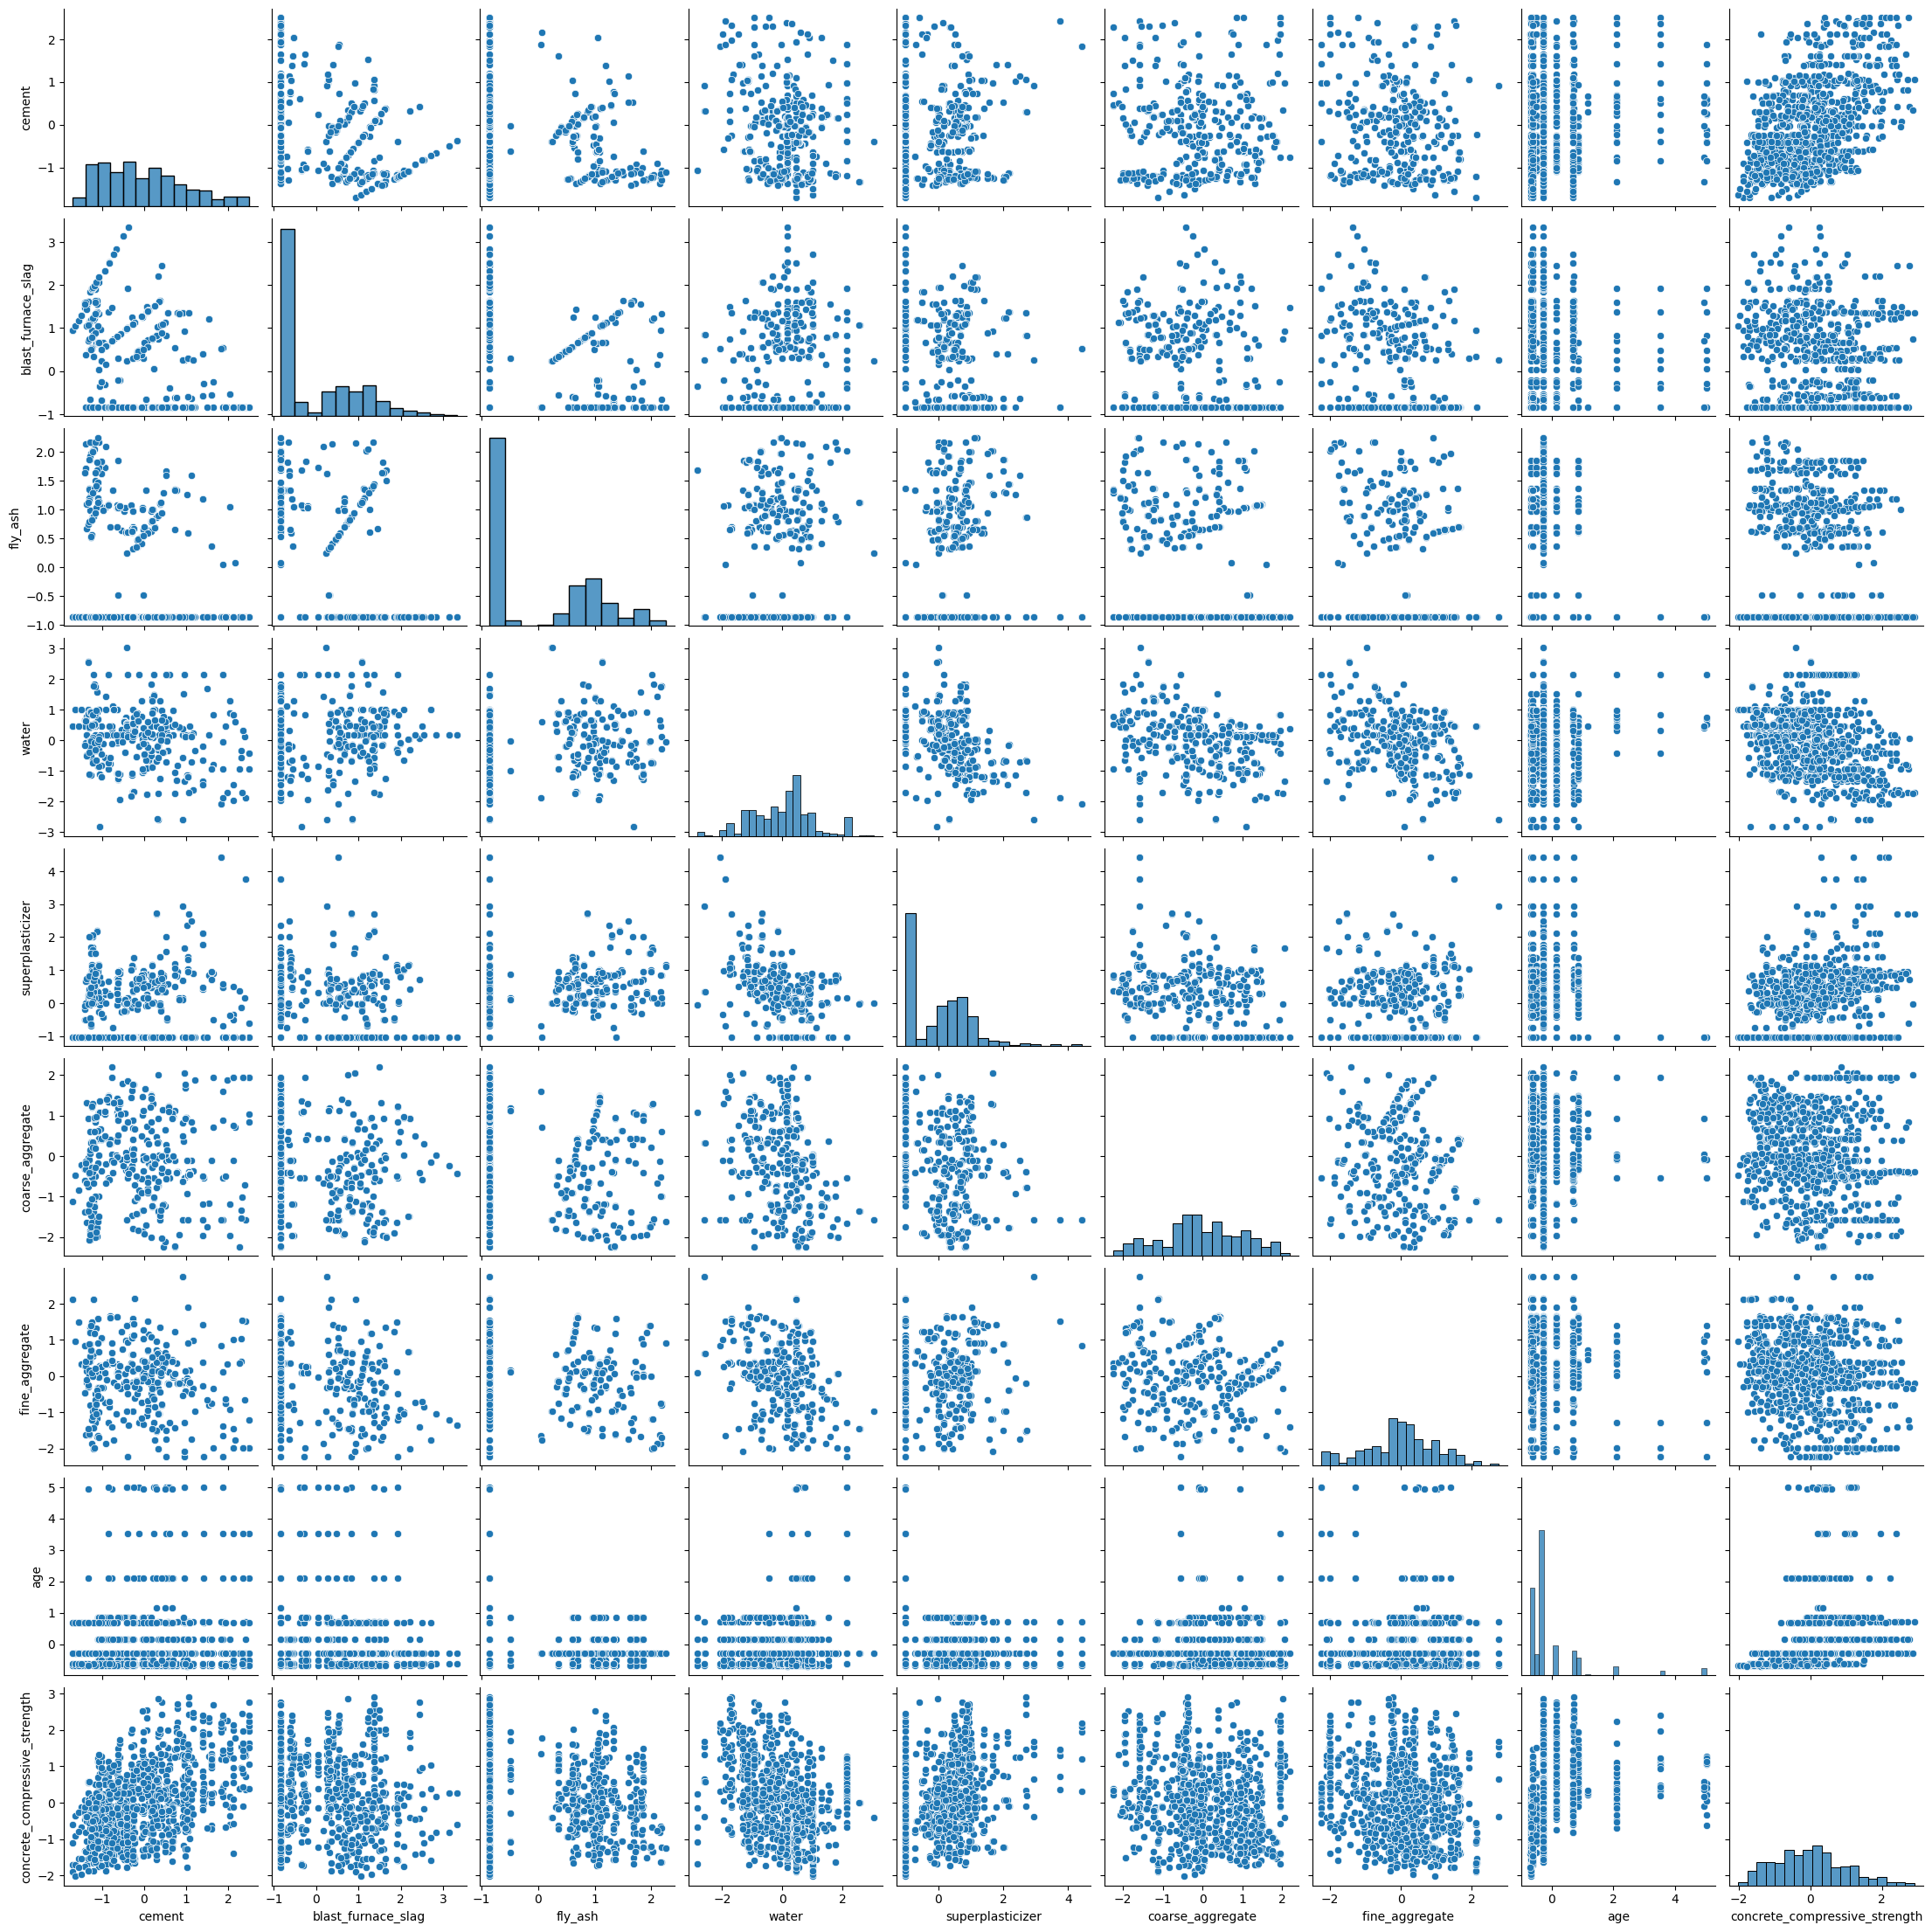

In [11]:
#to see relationship between the compressive and the other variable 
sns.pairplot(df, kind = 'scatter')

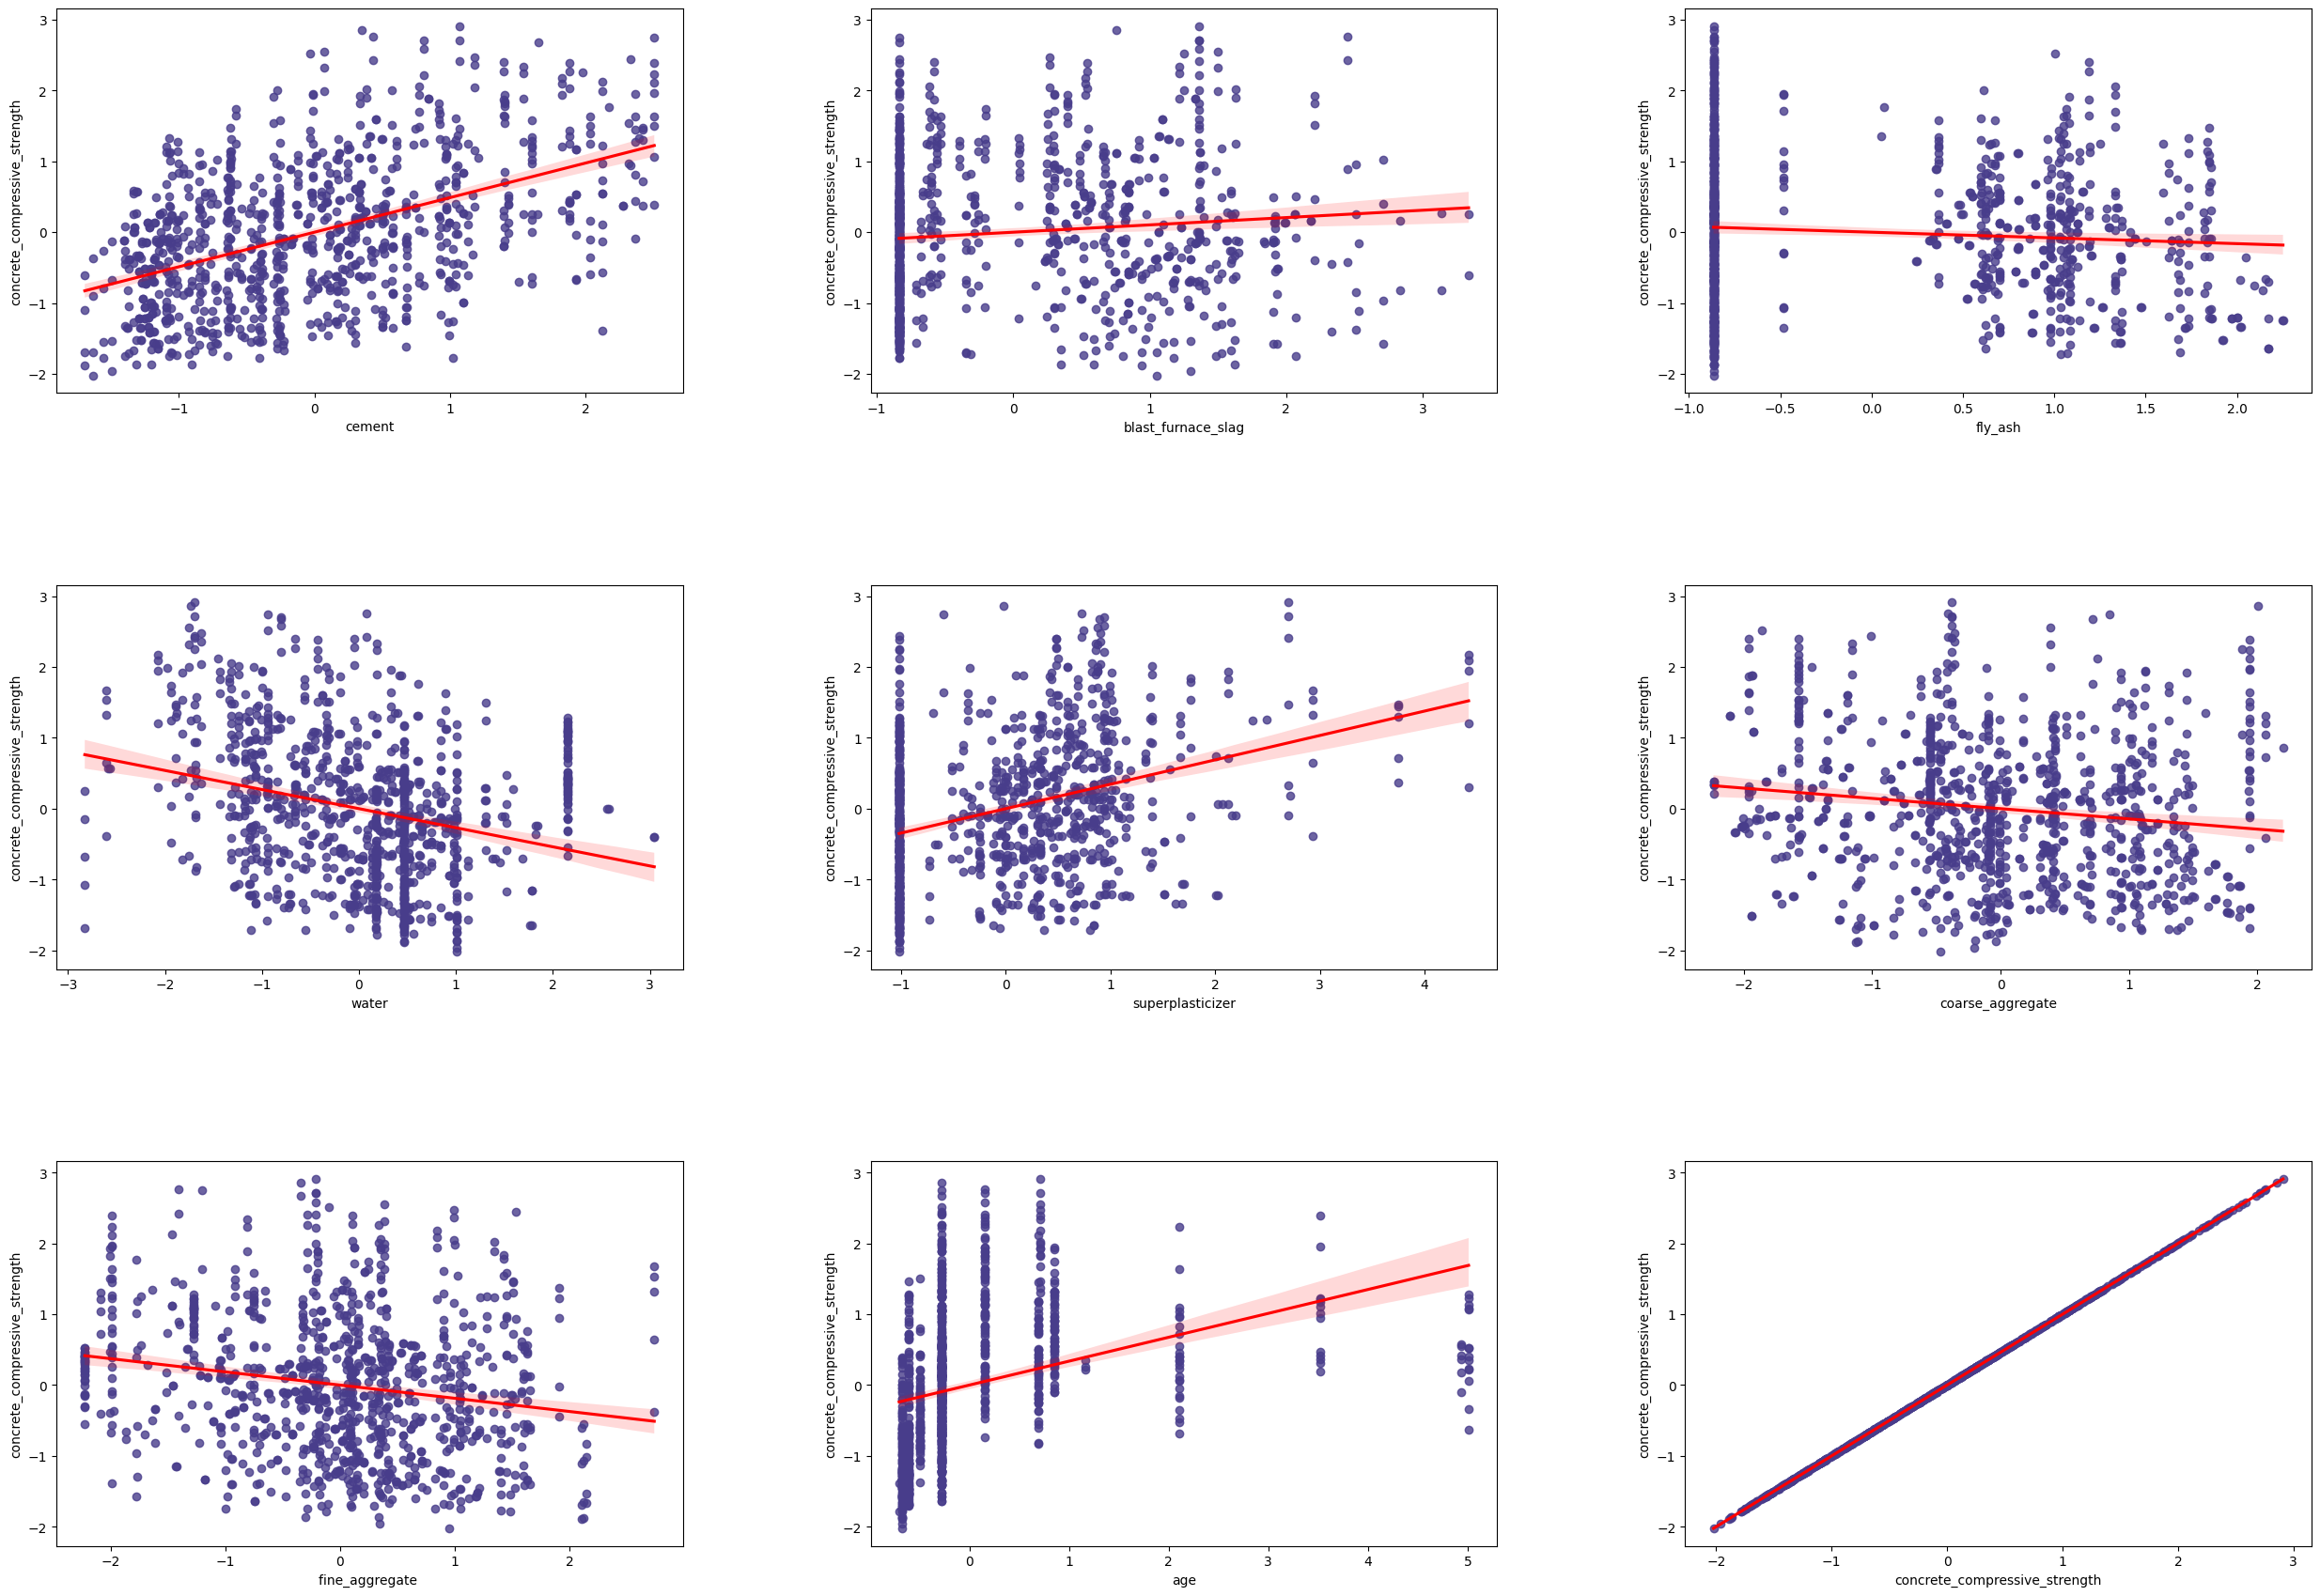

In [12]:
fig = plt.figure(figsize=(30, 50))
# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.9, wspace=0.3, hspace=0.5)

# Iterate over the columns of the DataFrame
for i, col in enumerate(df.columns):
    # Create a new subplot
    plt.subplot(15, 3, i + 1)
    
    # Create a regression plot in the current subplot
    # with x as the current column and y as "concrete_compressive_strength"
    # using data from the DataFrame df
    # Customize the scatter points to have a color of "darkslateblue"
    # and the regression line to have a color of "red"
    sns.regplot(x=col, y="concrete_compressive_strength", data=df, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

# Display the figure
plt.show()

<Axes: >

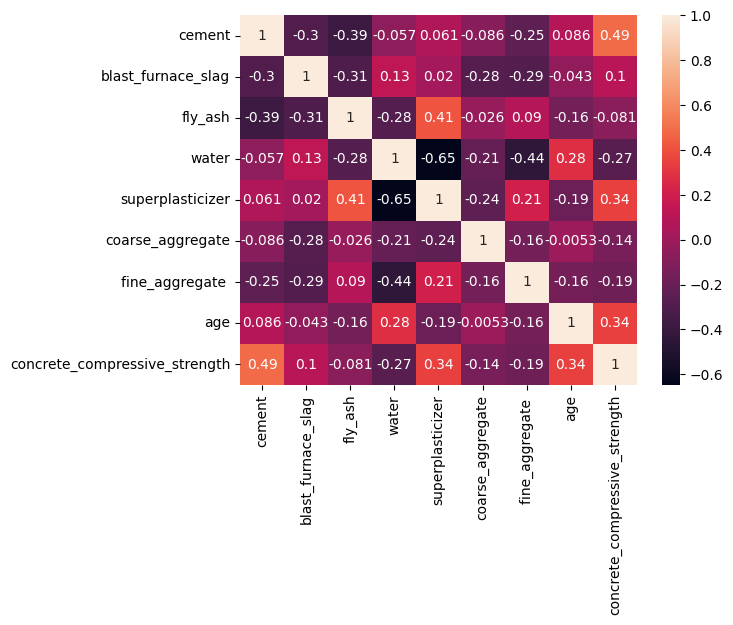

In [13]:
#ploting heatmap to analyse the relationship between variable
sns.heatmap(df.corr(),annot=True)

In [14]:
df.drop(["blast_furnace_slag"], axis=1, inplace=True)
df.drop(["coarse_aggregate"], axis=1, inplace=True)
df.drop(["fine_aggregate "], axis=1, inplace=True)
df.drop(["fly_ash"], axis=1, inplace=True)

# Print the updated DataFrame
df.head()

,cement,water,superplasticizer,age,concrete_compressive_strength
0,2.506116,-0.941235,-0.597131,-0.280312,2.748689
1,2.506116,-0.941235,-0.597131,-0.280312,1.636671
2,0.516516,2.153185,-1.019640,3.518569,0.308393
3,0.516516,2.153185,-1.019640,5.009865,0.356314
4,-0.767375,0.465320,-1.019640,4.931375,0.555986


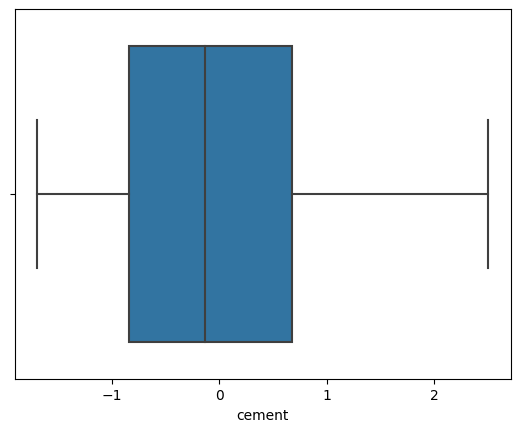

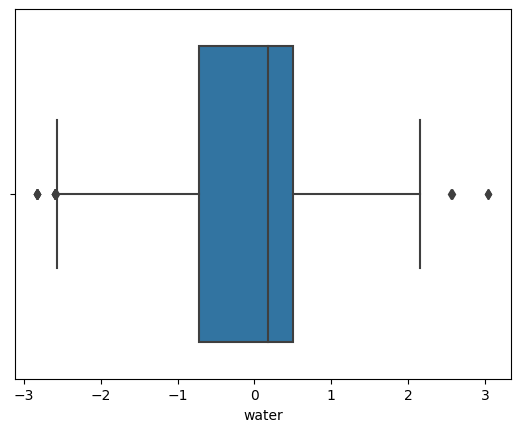

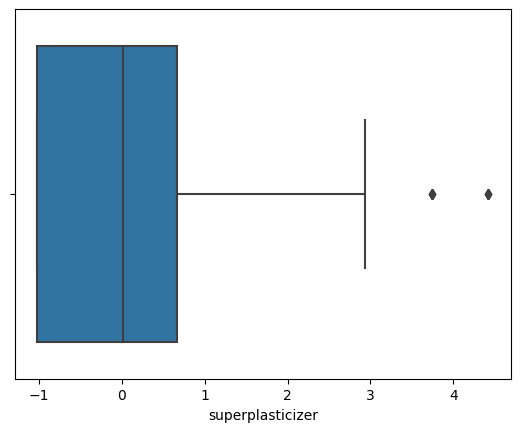

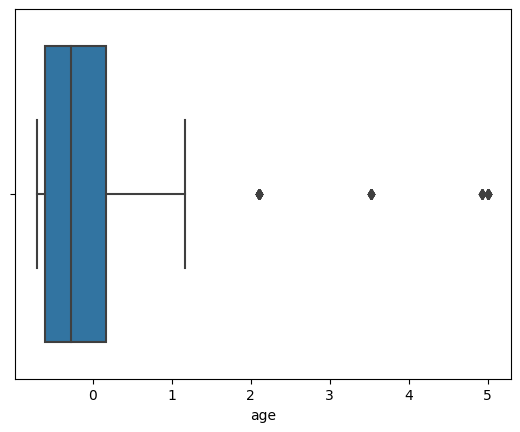

In [15]:
#ploting boxplot to spot outliers
l=['cement','water','superplasticizer','age']
for i in l:
    sns.boxplot(x=df[i]) 
    plt.show()

In [16]:
# Identify the quartiles
q1, q3 = np.percentile(df['age'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
 


# Identify the quartile  
q1, q3 = np.percentile(clean_data['water'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['water'] >= lower_bound) & (clean_data['water'] <= upper_bound)]

# Identify the quartile  
q1, q3 = np.percentile(clean_data['superplasticizer'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (0.75 * iqr)
upper_bound = q3 + (0.75 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['superplasticizer'] >= lower_bound) & (clean_data['superplasticizer'] <= upper_bound)]

df = clean_data

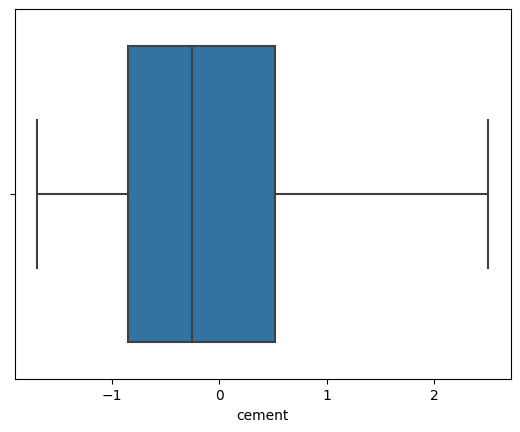

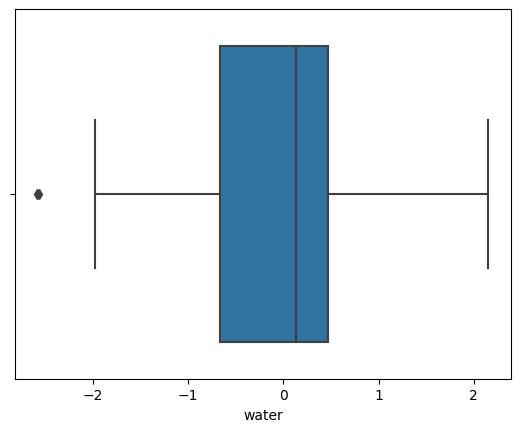

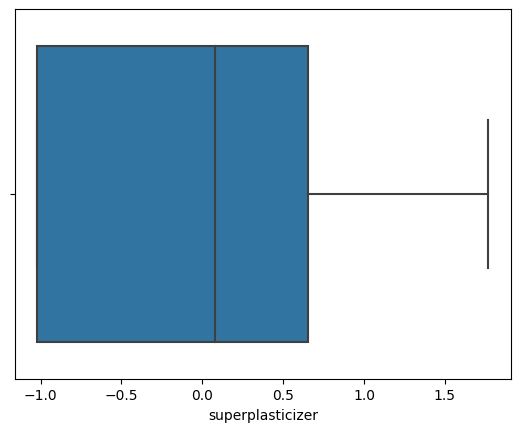

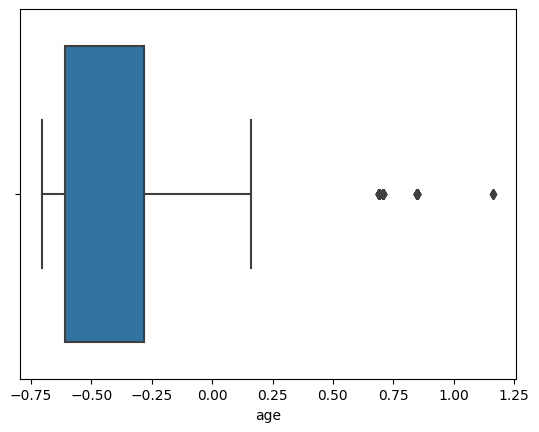

In [17]:
l=['cement','water','superplasticizer','age']
for i in l:
    sns.boxplot(x=df[i]) 
    plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [19]:
# independent variables
x = df.drop(['concrete_compressive_strength'],axis=1)
# dependent variables
y = df['concrete_compressive_strength']

In [20]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
yhat = lr.predict(x)
print('the root mean square value is:',lr.score(xtrain,ytrain))
print('the mean square error is:',mean_squared_error(y,yhat))

the root mean square value is: 0.6118392540425484
the mean square error is: 0.35768412049259224


/tmp/ipykernel_18/2619070241.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['concrete_compressive_strength'], hist=False, color="r", label="Actual Values", ax=ax)
/tmp/ipykernel_18/2619070241.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat, hist=False, color="b

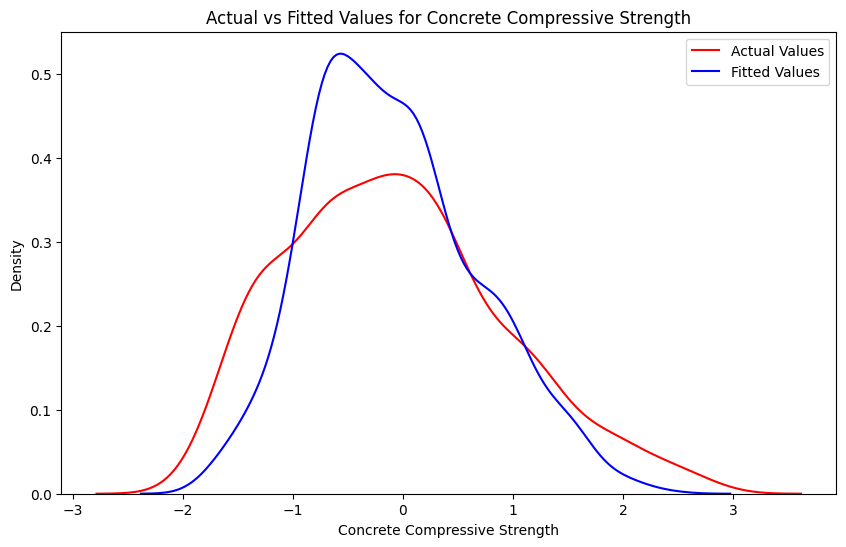

In [22]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual values
sns.distplot(df['concrete_compressive_strength'], hist=False, color="r", label="Actual Values", ax=ax)

# Plot the fitted values
sns.distplot(yhat, hist=False, color="b", label="Fitted Values", ax=ax)

# Set labels and title
ax.set_xlabel('Concrete Compressive Strength')
ax.set_ylabel('Density')
plt.title('Actual vs Fitted Values for Concrete Compressive Strength')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [23]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
rd= Ridge(alpha=0.4)
ls= Lasso(alpha=0.3)
fit_rd=rd.fit(xtrain,ytrain)
rdhat = rd.predict(x)
print('score od ridge regression is:-',rd.score(xtest,ytest))

score od ridge regression is:- 0.6781140470513632


/tmp/ipykernel_18/3788574385.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['concrete_compressive_strength'], hist=False, color="r", label="Actual Values", ax=ax)
/tmp/ipykernel_18/3788574385.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rdhat, hist=False, color="

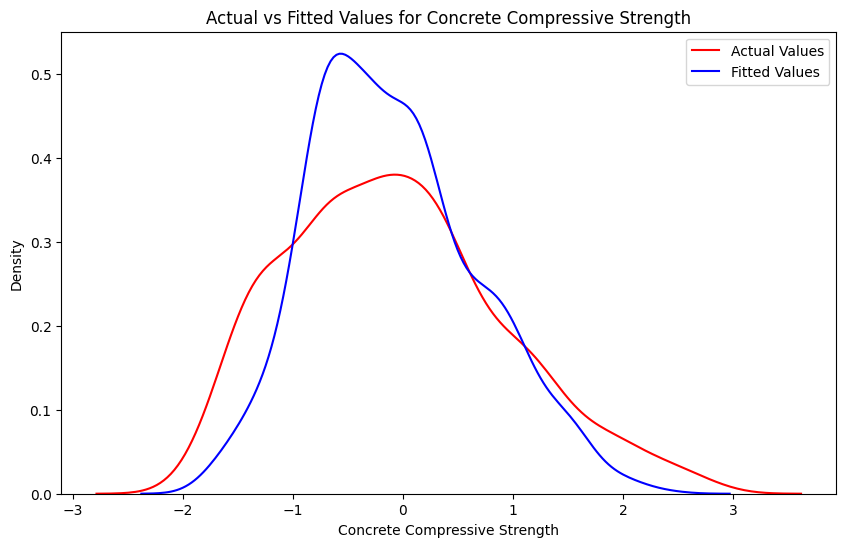

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual values
sns.distplot(df['concrete_compressive_strength'], hist=False, color="r", label="Actual Values", ax=ax)

# Plot the fitted values
sns.distplot(rdhat, hist=False, color="b", label="Fitted Values", ax=ax)

# Set labels and title
ax.set_xlabel('Concrete Compressive Strength')
ax.set_ylabel('Density')
plt.title('Actual vs Fitted Values for Concrete Compressive Strength')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rnd= RandomForestRegressor(ccp_alpha=0.0)
fit_rnd= rnd.fit(xtrain,ytrain)
rndhat = rnd.predict(x)
print('score is:-',rnd.score(xtest,ytest))

score is:- 0.8104253273132781


/tmp/ipykernel_18/1204499545.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['concrete_compressive_strength'], hist=False, color="r", label="Actual Values", ax=ax)
/tmp/ipykernel_18/1204499545.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rndhat, hist=False, color=

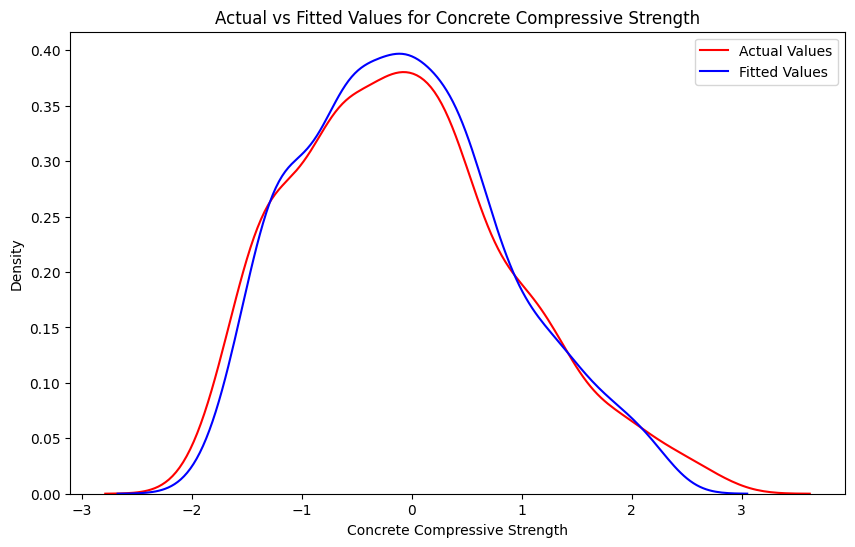

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual values
sns.distplot(df['concrete_compressive_strength'], hist=False, color="r", label="Actual Values", ax=ax)

# Plot the fitted values
sns.distplot(rndhat, hist=False, color="b", label="Fitted Values", ax=ax)

# Set labels and title
ax.set_xlabel('Concrete Compressive Strength')
ax.set_ylabel('Density')
plt.title('Actual vs Fitted Values for Concrete Compressive Strength')

# Show legend
plt.legend()

# Display the plot
plt.show()